# YOLOv4

### 배경
- Object Detection에서 사용하는 최신 방법들을 소개 및 실험
- 실시간 요구하는 task에 부적한 Detection

### Contribution
- 하나의 GPU에서 훈련할 수 있는 빠르고 정확한 Object Detector
- BOF(Bag of Freebies): inference 비용을 늘리지 않고 정확도 향상시키는 방법
- BOS(Bag of Specials): inference 비용을 조금 높이지만 정확도가 크게 향상하는 방법ㅂ
- GPU 학습에 더 효율적이고 적합하도록 방법들을 변형

### Object Detection Model

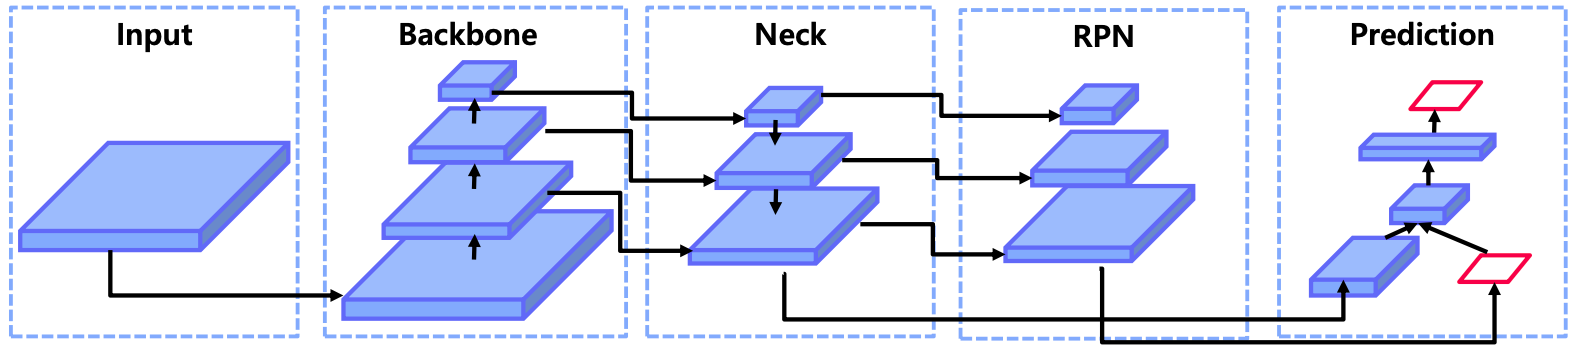



- Input: Image, Patches, Image Pyramid
- Backbone을 거쳐 Semantic이 가능한 feature들로 바뀜
  - GPU(VGG, ResNet, ResNext, DenseNet), CPU(SqueezeNet, MobileNet, ShuffleNet
- Neck
  - Additional blocks(SPP, ASPP), Path-aggregation blocks(FPN, PAN, NAS-FPN, BiFPN)
- Head
  - Dense Prediction(one-stage): RPN, YOLO, SSD, RetinaNet, CornerNet, FCOS (*RPN은 one-stage가 아님)
  - Sparse Prediction(two-stage): Faster R-CNN, R-FCN, Mask R-CNN

### Bag of Freebies
- Data Augmentations
  - Photometirc Distortions, Geometric Distortions, CutOut, Random Erase, MixUp, CutMix, GAN
- Semantic Distribution Bias
  - Hard Negative Mining, OHEM, Focal Loss, Label Smoothing
- Bounding Box Regression
  - MSE, GIoU, DIoU, CIoU

##### Data Augmentation
- 입력 이미지를 변화시켜 overfitting으 막고, 다양한 환경에서도 강력해지는 방법
- Brightness, Hue, Saturation을 바꾸는 Color Transform
- Shift, Rotate와 같은 Geometric Transform
- CutOut, CutMix, MixUp



##### Semantic Distribution Bias
- 데이터셋에 특정 라벨(배경)이 많은 경우 불균형을 해결하기 위한 방법
- Hard Negative Mining: 어려운 배경을 강제로 배치에 더 많이 배치
- Focal Loss: 어려운 예제에서 Gradient가 크게 함
- Label smoothing: 라벨에 0 또는 1로 설장하는 것이 아니라 smooth하게 부여 -> 모델의 overfitting을 막아주고 regularization 효과

##### Bounding Box Regression
- MSE(BBox 좌표값들을 예측하는 방법)은 거리가 일정하더라도 IoU가 다를 수 있음
- IoU 기반 loss 제안(IoU는 1에 가까울수록 잘 예측한 것이므로 loss처럼 사용 가능)
- GIoU: IoU 기반 loss, IoU가 0인 경우에 대해서 차별화하여 loss 부여, 두 BBox의 거리를 고려

### Bag of Specials
- Enhancement of Receptive field: Spatial Pyramid Pooling(SPP), Atrous SPP(ASPP), Receptive Field Block(RFB)
- Attention Module: Squeeze-and-Excitations(SE), Spatial Attention Module(SAM)
- Feature Integration: Feature Pyramid Network(FPN), Scale-wise Feature Aggregation Module(SFPM), Adaptively Spatial Feature Fusion(ASFF), BiFPN
- Activation Function: ReLU, Leaky ReLU, Parametric ReLU, ReLU6, Swish, Mish
- Post-processing method: Non Maximum Suppression(NMS), Soft NMS, DIoU NMS

##### Enhance Receptive field
- Feature map의 receptive field를 키워서 검출 성능을 높이는 방법: SPP(conv layer의 마지막 feature map을 고정된 크기의 grid로 분할해 pooling하여 고정된 크기의 벡터 출력), ASPP, Transformer의 Shifted Window

##### Attention Module
- Feature Map에 Global Attention 추가
- SE(Sqeeze-and-Excitation Block): Feature Map에 Global 정보를 추가, 채널의 중요도 반영
- CBAM(Convolutional Block Attention Module)

##### Feature Integration
- Feature map 통합하기 위한 방법

##### Activation Function
- 좋은 activation 함수는 gradient가 더 효율적으로 전파
- ReLU: Gradient vanishing 문제 해결하기 위한 활성 함수로 등장, 음수 값이 나오면 훈련이 되지 않는 현상 발생
- Swish/Mish: 약간의 음수 허용하기 때문에 ReLU의 zero bound보다 gradient 흐름에 좋은 영향, 모든 구간에서 미분 가능

##### Post-processing Method
- 불필요한 Bbox 제거하는 방법

### BoF and BoS for YOLOv4 backbone
- Activations: ReLU, leaky-ReLU, parametric-ReLU, ReLU6, SELU, Swish, Mish
- Bounding box regressiong loss: MSE, IoU, GIoU, DIoU, CIoU
- Data augmentation: CutOut, MixUp, CutMix
- Regularization method: DropOut, DropPath, Spatial DropOut, DropBlock
- Normalization: Batch Normalization(BN), Cross-GPU Batch Normalization(CGBN/SyncBN), Filter Response Normalization(FRN), Cross-Iteration Batch Normalization(CBN)
- Skip-connections: Residual connections, Weighted residual connections, Multi-input weighted residual connections, Cross stage partial connections(CSP)
- Others: label smoothing

### Detector 디자인 고려사항
- 작은 물체를 검출하기 위해서 큰 네트워크 입력 사이즈 필요(resolution이 큰 이미지 사용)
- 네트워크 입력 사이즈가 증가함으로써 큰 receptive field 필요 -> layer 개수 증가
- 하나의 이미지로 다양한 사이즈의 물체를 검출하기 위해 모델의 용량이 더 커야함 -> 모델 파라미터 증가

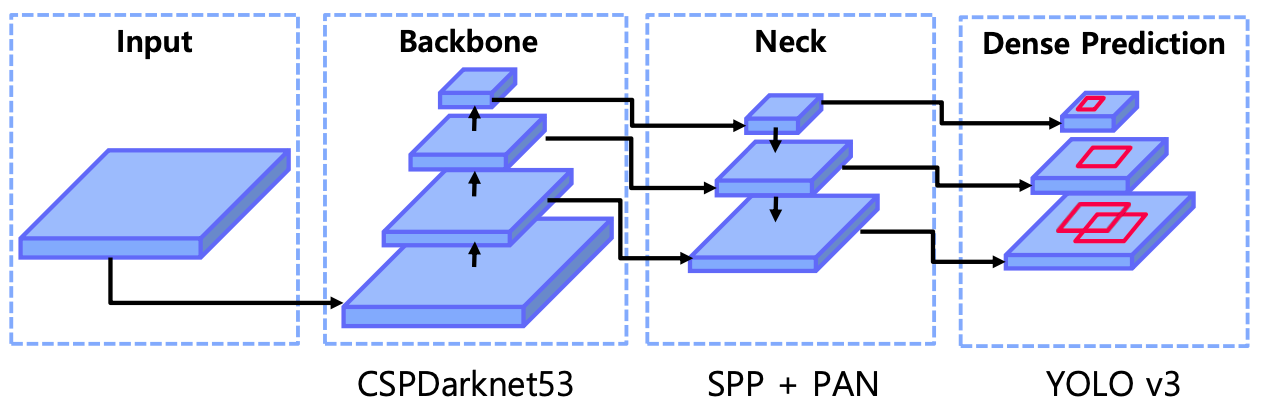

##### Cross Stage Partial Network(CSPNet)
- 정확도 유지하면서 경량화
- 메모리 cost 감소
- 다양한 backbone에서 사용가능
- 연산 bottleneck 제거

- 기존 DenseNet의 문제점: 가중치 업데이트할 때 gradient 정보가 재사용
- 계산량을 줄이기 위해서 반복되는 gradient를 줄이기
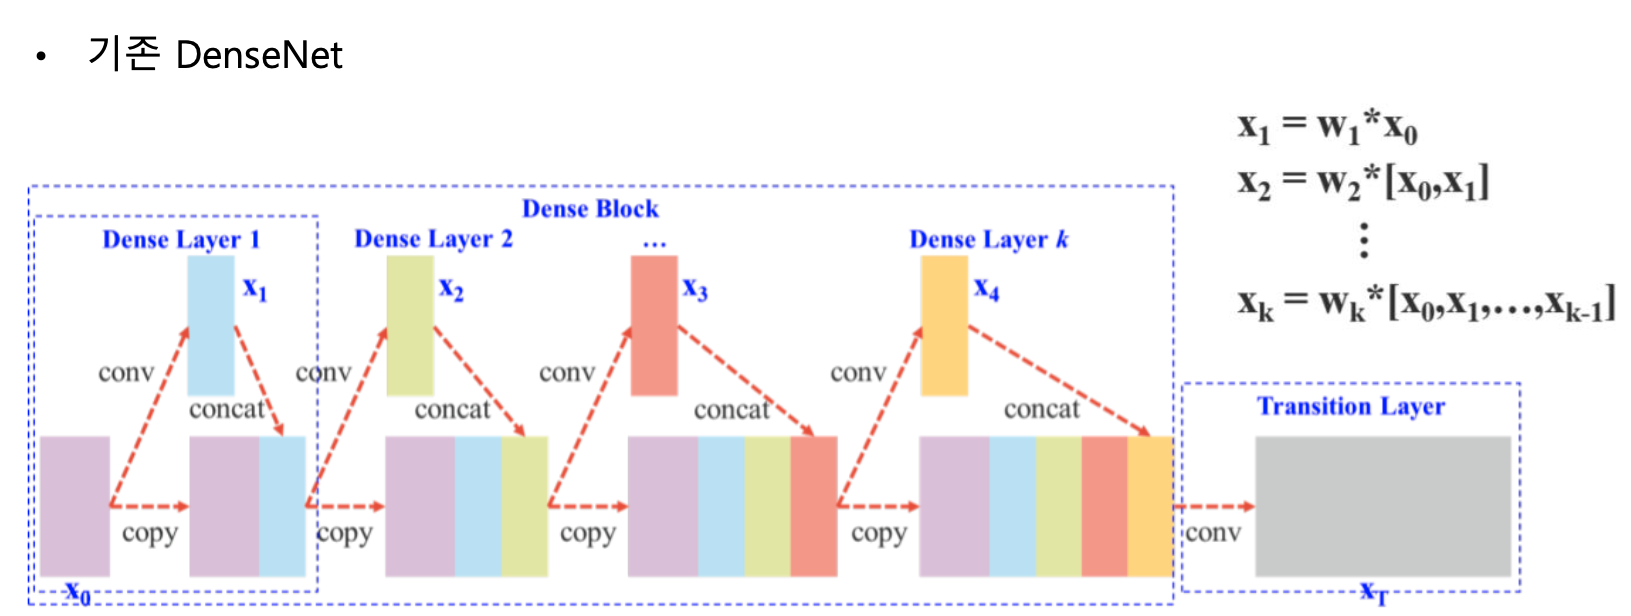 

- gradient information 많아지는 것을 방지
- gradient flow를 나눠서 학습에 좋은 영향을 줌
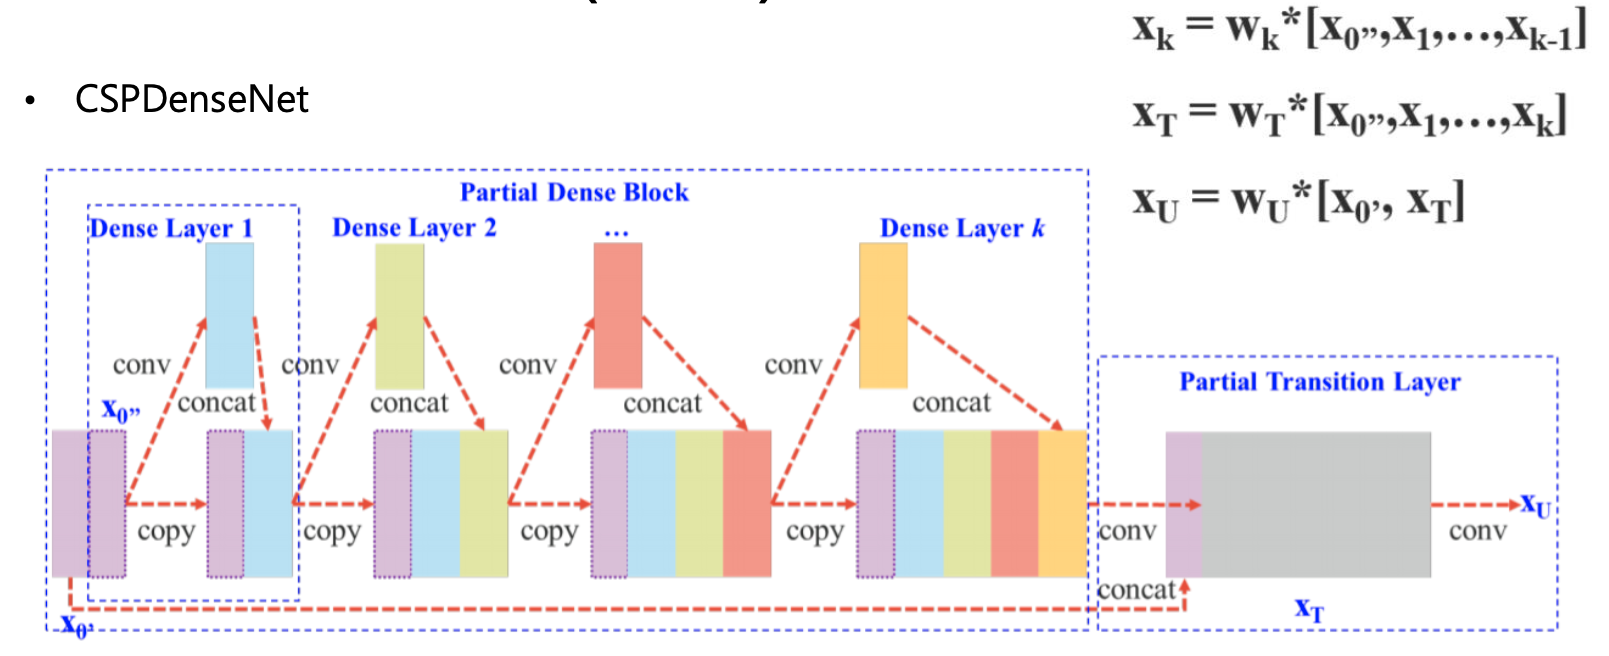

##### Additional Improvements
- 새로운 data augmentation 방법: Mosaic, Self-Adversarial Training(SAT)
- 기존 방법 변형: modified SAM, modified PAN, Cross mini-Batch Normalization(CmBN)

- Mosaic: 학습 이미지 4장을 하나의 이미지로 합침, batch size가 커지는 효과, 작은 batch size를 사용해도 학습이 잘 됨
- Self-Adversarial Training: 2-stage를 거쳐서 수행,
  1) 원본이미지를 변형시켜 이미지 안에 객체가 없어보이게 하는 adversarial perturbation 추가
  2) 변형된 이미지를 이용해서 학습

- Modified Spatial Attention Module
- Modified Path Aggregation Network
- Cross mini-Batch Normalization
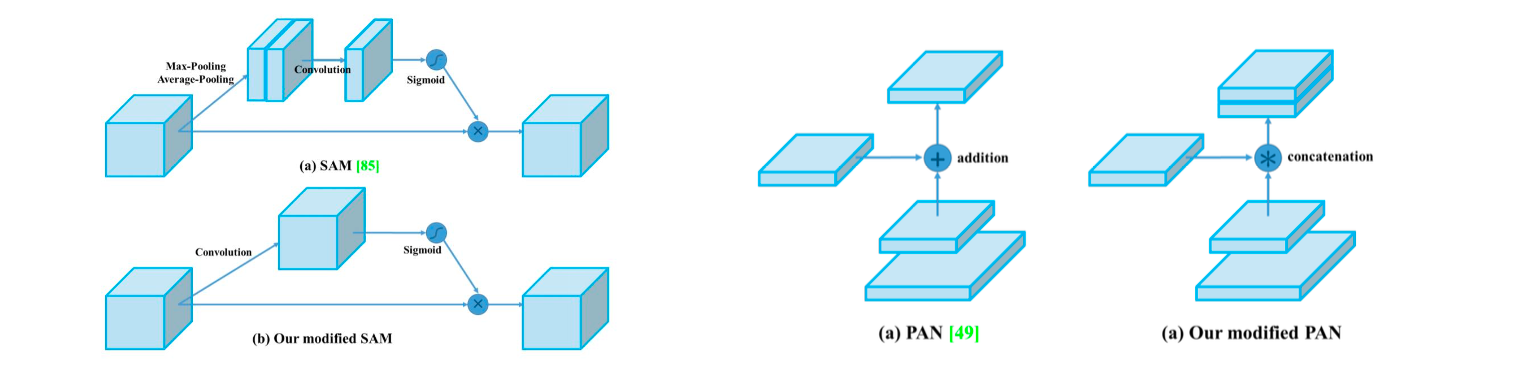
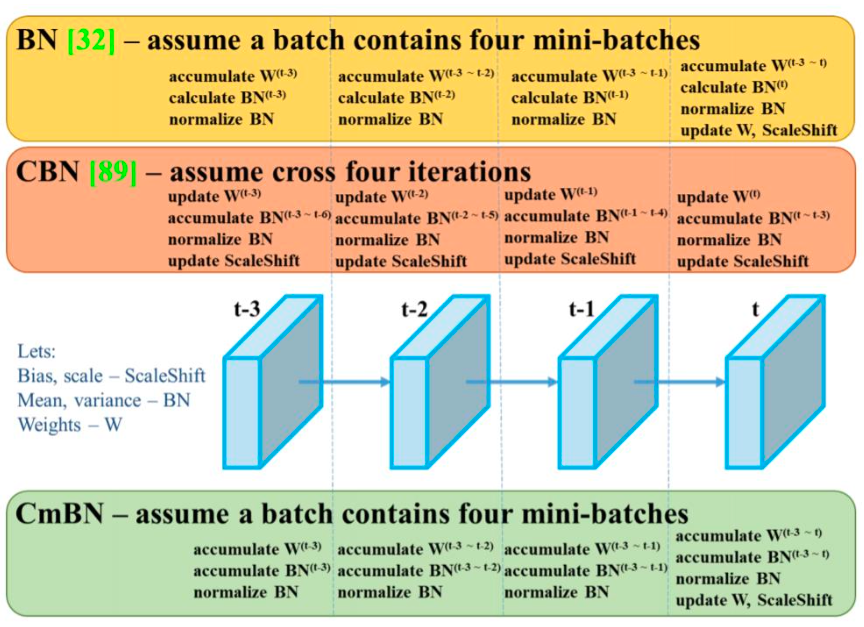

### Result
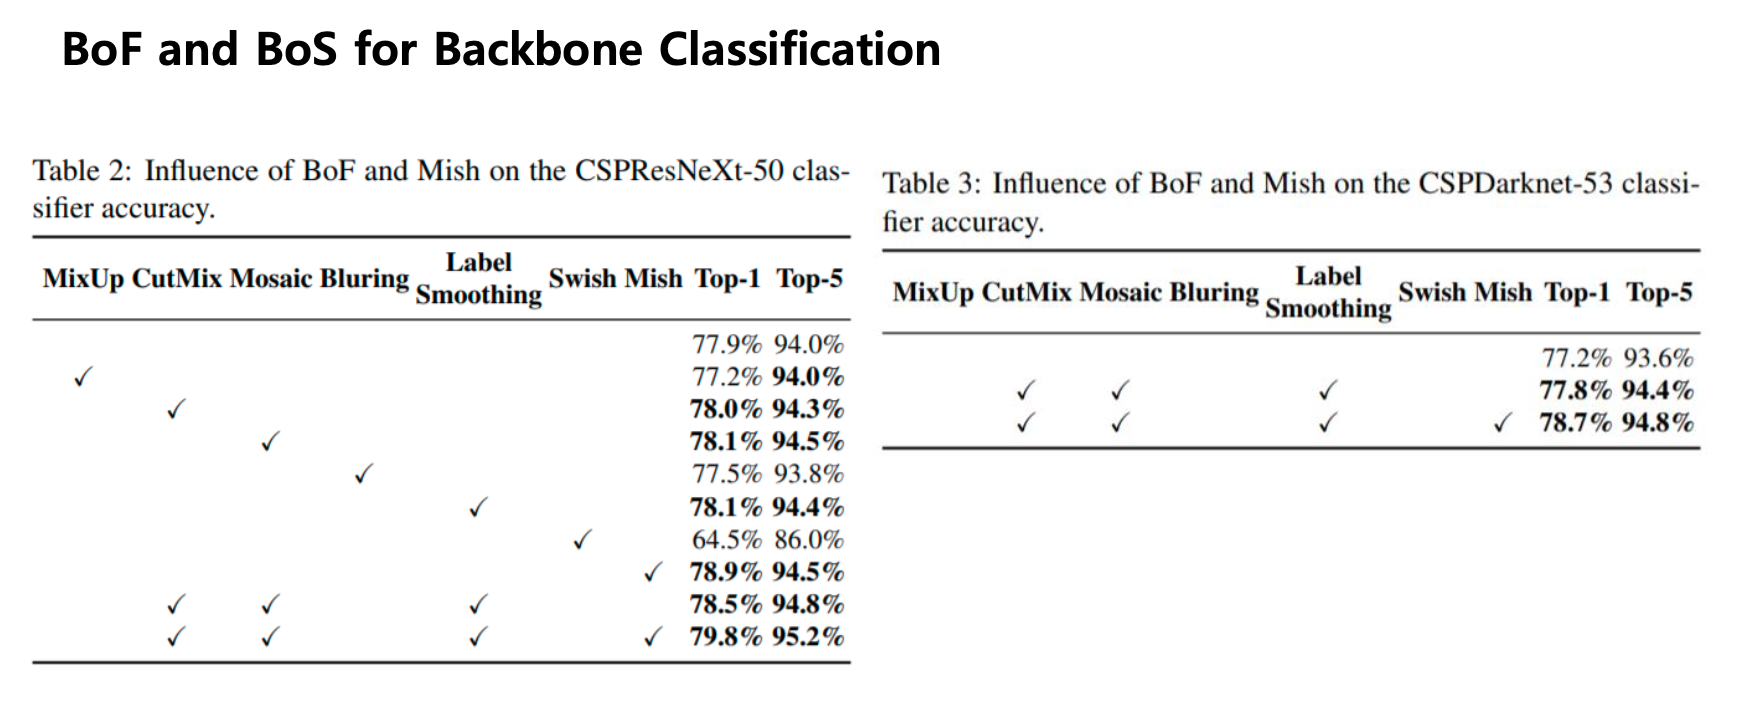
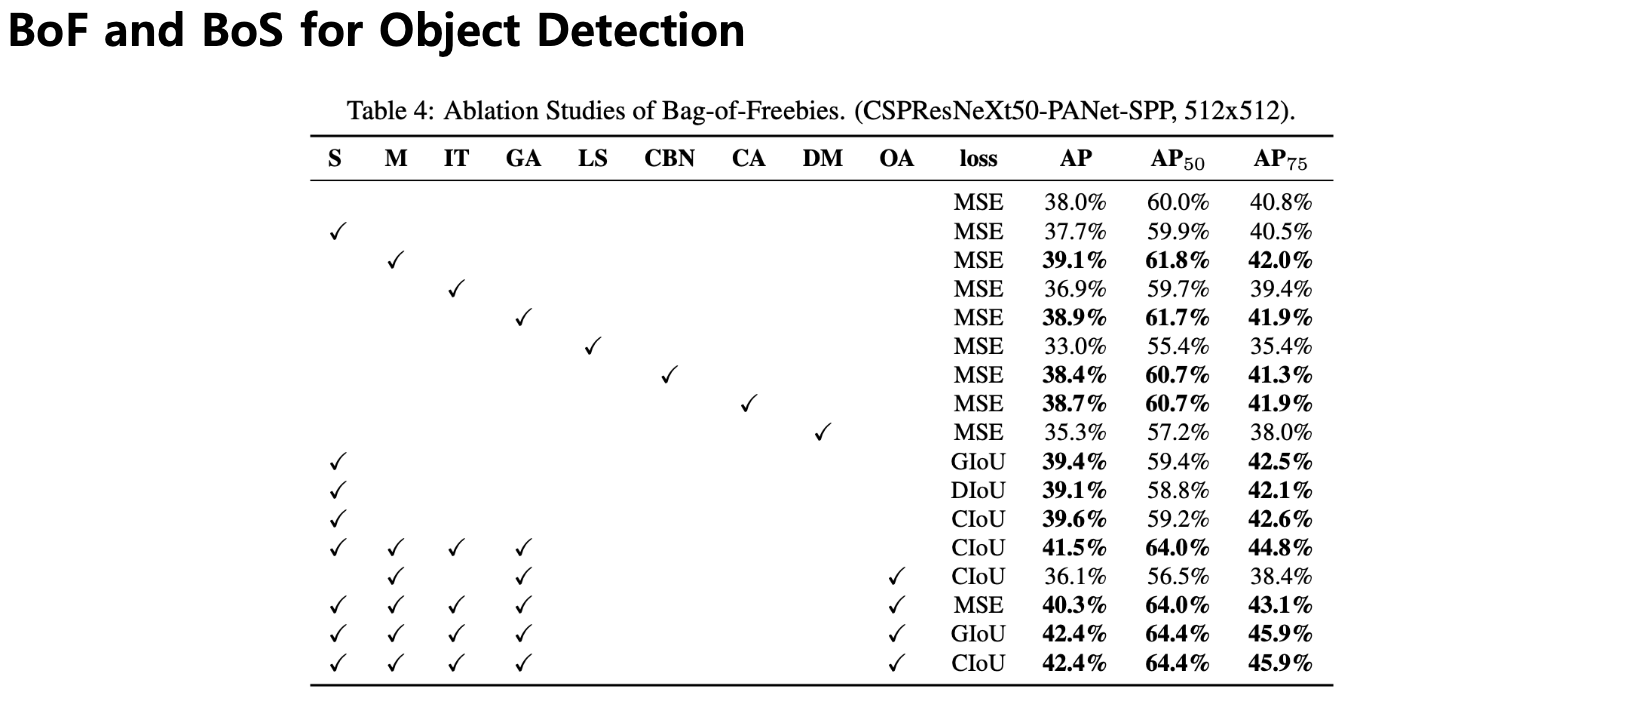